In [297]:
from pathlib import Path

import os

In [290]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [291]:
%autoreload 2

In [292]:
import mushroom.data.cosmx as cosmx
import mushroom.utils as utils

In [298]:
cosmx_dir = '/diskmnt/primary/CosMx/data/HT413C1-Th1K4A1Us34_1___HT413C1-Th1K4A1Us7_1'
save_dir = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/cosmx'
Path(save_dir).mkdir(parents=True, exist_ok=True)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


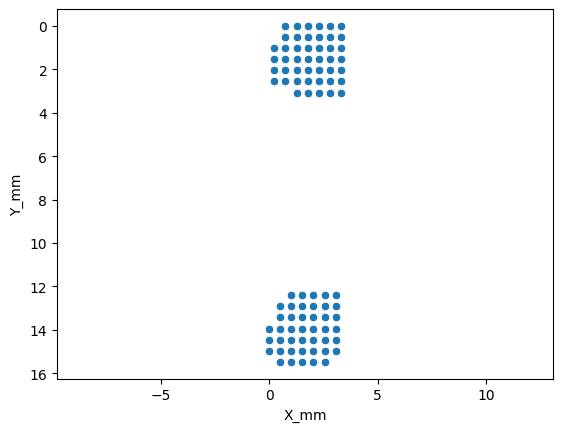

In [294]:
cosmx.display_fovs(cosmx_dir)

In [315]:
scaler = .1
sample_to_bbox = {
    'HT413C1-Th1K4A1Us7_1': (0, 5, 0, 5), # top, bottom, left, right
    'HT413C1-Th1K4A1Us34_1': (11, 16, 0, 5),
}

In [316]:
sample_to_adata = cosmx.adata_from_cosmx(cosmx_dir, sample_to_bbox=sample_to_bbox, scaler=scaler)

In [317]:
directory = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/cosmx'
for sid, adata in sample_to_adata.items():
    adata.write_h5ad(os.path.join(save_dir, f'{sid}.h5ad'))

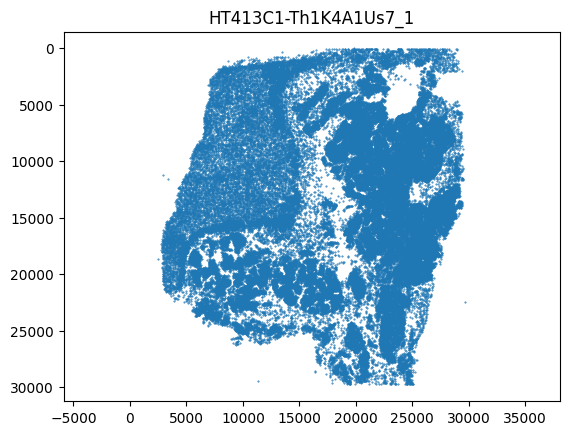

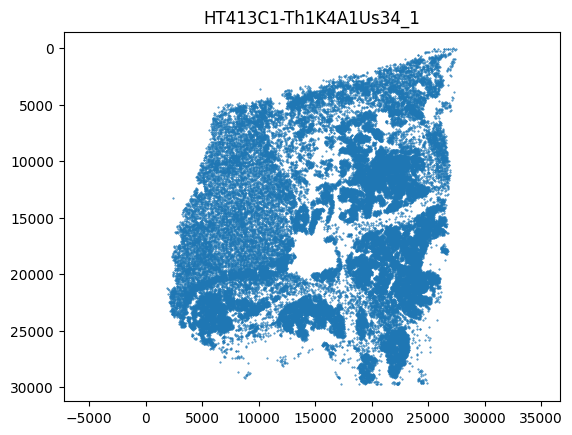

In [318]:
for sid, adata in sample_to_adata.items():
    plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1], s=.2)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(sid)
    plt.show()

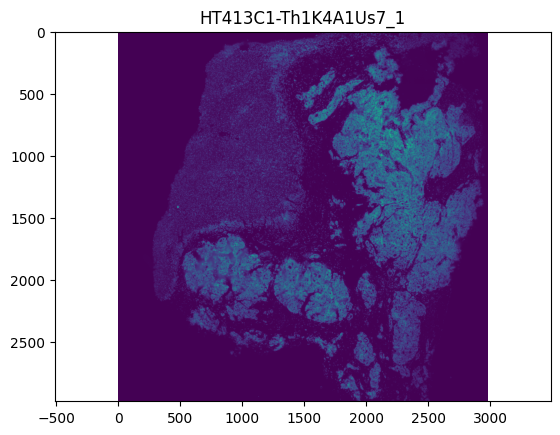

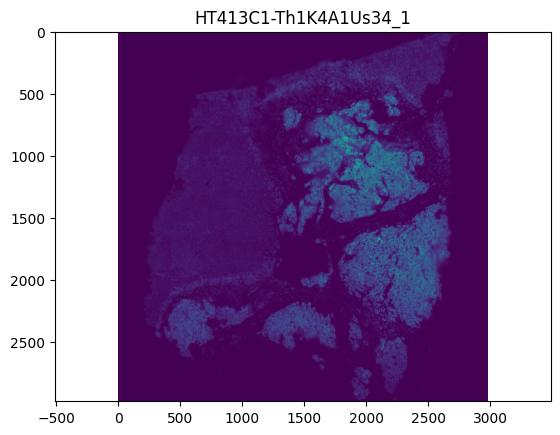

In [319]:
for sid, adata in sample_to_adata.items():
    img = next(iter(adata.uns['spatial'].values()))['images']['hires']
    plt.imshow(img)
    plt.axis('equal')
    plt.title(sid)
    plt.show()